> Зроблено за допомогою ChatGPT (і перероблено)

### Вступ
Лінійне програмування є потужним інструментом для розв'язання задач оптимізації в багатьох галузях, включаючи економіку та бізнес. У цій навчальній записці ми розглянемо застосування лінійного програмування для оптимізації прибутків в комп'ютерних іграх з аукціоном. Ми використаємо простий приклад для ілюстрації того, як можна сформулювати задачу оптимізації як задачу лінійного програмування та як її можна розв'язати за допомогою Python.

### Формулювання
Допустимо, що ви граєте в комп'ютерну гру, в якій є три різних предмети, які можна купити на аукціоні. Ви хочете купити якомога більше предметів та заробити якомога більше золота на їх продажу. Ви знаєте, скільки золота ви отримаєте за кожен предмет, а також скільки золота ви готові заплатити за кожен предмет на аукціоні. Ці дані можна представити у вигляді матриці:

|Предмет    |Прибуток (золото)  |Макс. вартість (золото)    |
|:---|:---|:---|
|1	|10	|8 |
|2	|7	|7 |
|3	|5	|12 |

Ви хочете визначити, скільки кожного предмета ви повинні купити на аукціоні, щоб максимізувати свій прибуток. Давайте сформулюємо цю задачу як задачу лінійного програмування. Позначимо через $x_i$ кількість предмету $i$, який ми купуємо на аукціоні. Тоді наша мета полягає в максимізації сумарного прибутку:

$$
\max_{x1​,x2​,x3}\;​10x1​+7x2​+5x3
$$

При цьому ми повинні дотримуватися обмежень нашого бюджету, тобто не витрачати більше, ніж ми маємо. Обмеження можна виразити наступним чином:

$$8x1​+7x2​+12x3​≤B,$$

де $B$ - наш бюджет.

Ці дві формули разом утворюють задачу лінійного програмування:

$$
\begin{aligned}
\max_{x_1,x_2,x_3} && 10x_1 + 7x_2 + 5x_3 \\
\text{за умови} && 8x_1 + 7x_2 + 6x_3 \leq B \\
&& x_1, x_2, x_3 \geq 0
\end{aligned}
$$

> інсталюємо додаткові бібліотеки та імпортуємо їх

In [1]:
%pip install scipy

   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
    --------------------------------------- 0.5/41.0 MB 4.0 MB/s eta 0:00:11
   - -------------------------------------- 1.3/41.0 MB 4.1 MB/s eta 0:00:10
   -- ------------------------------------- 2.6/41.0 MB 4.6 MB/s eta 0:00:09
   --- ------------------------------------ 3.9/41.0 MB 5.1 MB/s eta 0:00:08
   ---- ----------------------------------- 5.0/41.0 MB 5.2 MB/s eta 0:00:07
   ------ --------------------------------- 6.3/41.0 MB 5.4 MB/s eta 0:00:07
   ------- -------------------------------- 7.6/41.0 MB 5.6 MB/s eta 0:00:06
   -------- ------------------------------- 8.9/41.0 MB 5.7 MB/s eta 0:00:06
   ---------- ----------------------------- 10.5/41.0 MB 5.8 MB/s eta 0:00:06
   ----------- ---------------------------- 12.1/41.0 MB 6.0 MB/s eta 0:00:05
   ------------- -------------------------- 13.6/41.0 MB 6.2 MB/s eta 0:00:05
   -------------- ------------------------- 15.2/41.0 MB 6.3 MB/s eta 0:00:05
  


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

> оскільки маємо 3 невідомі у рівнянні обмежень то будемо мати площину, побудуємо її

Text(0.5, 0.92, 'Площина обмежень')

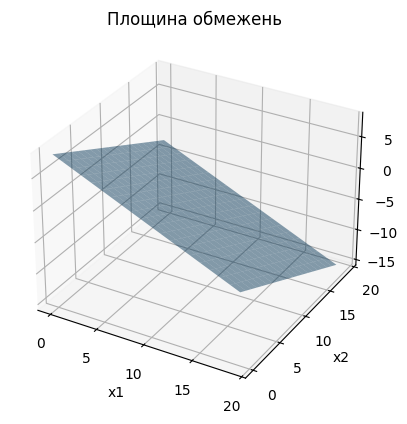

In [3]:
B = 100 # золотих

x1 = np.arange(0, 20)
x2 = np.arange(0, 20)
x1, x2 = np.meshgrid(x1, x2)
x3 = (B - 8*x1 - 7*x2)/12

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x1, x2, x3, alpha=0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title("Площина обмежень")

> для розуміння розвязку можна зробити проекцію на вісь Х3

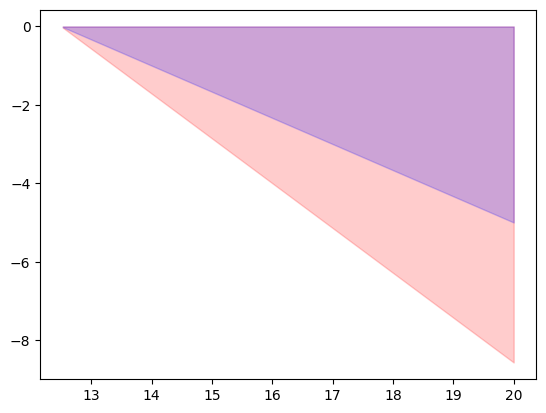

In [4]:
x1 = np.linspace(0, 20, 100)
x21 = (B-8*x1)/7 # За умови що х3=0
x31 = (B-8*x1)/12 # За умови що х2=0

plt.fill_between(x1, x21, 0, where=x21<0, alpha=0.2, color='red')
plt.fill_between(x1, x31, 0, where=x31<0, alpha=0.2, color='blue')

### Знаходження розвязку

In [5]:
# обертаємо задачу на знаходження мінімуму
c = np.array([10, 7, 5])

# Записуємо матрицю умов (з коефіцієнтів рівнянь)
A = np.array([
    [8, 7, 12]
])

# Записуємо матрицю розвязків
b = np.array([B])

# Записуємо вектор обмежень області значень
bnd = [(0, None), (0, None), (0, None)]

# Знаходимо розвязки задачі
res = linprog(-c, A_ub=A, b_ub=b, bounds=bnd)

x1, x2, x3 = res.x
profit = -res.fun

# Результати
print(f"Кількість предмету 1: {x1}")
print(f"Кількість предмету 2: {x2}")
print(f"Кількість предмету 3: {x3}")
print(f"Загальний прибуток: {profit} золотих")

Кількість предмету 1: 12.5
Кількість предмету 2: 0.0
Кількість предмету 3: 0.0
Загальний прибуток: 125.0 золотих
